# Linear Regression

In [2]:
import os
import numpy as np
from matplotlib import pyplot
import pandas as pd
%matplotlib inline

## Linear Regression with one variable

### Load the dataset

The file `Data/ex1data.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 
The dataset is loaded from the data file into the variables `X` and `Y`.

In [11]:
os.path.join('Data', 'Data/ex1data.txt')

'/Data/ex1data.txt'

In [13]:
data = np.loadtxt('Data/ex1data.txt', delimiter=',')
X, Y = data[:, 0], data[:, 1]

### Plot the dataset


Text(0.5, 0, 'Population of City in 10,000s')

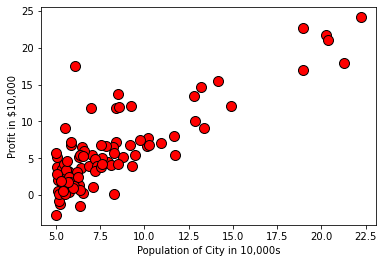

In [14]:
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')

### Learn the parameters

In [15]:
def predict(x, theta0, theta1):
    h_x = 0.0
    h_x = theta0 + theta1*x
    return h_x

In [16]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



In [18]:
def computeCost(X, Y, theta0, theta1):
    m = Y.size
    J = 0
    sum = 0;
    for i in range(0,m):
          sum += (predict(X[i],theta0,theta1)-Y[i])**2
    J= (1/(2*m))*sum
    return J

In [9]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



In [19]:
def gradientDescent(X, Y, alpha, n_epoch):
    m = Y.size  # number of training examples
    J = list()  # list to store cost

    theta0 = 0.0
    theta1 = 0.0
    
    for epoch in range(n_epoch):
        sum0 = 0
        sum1 =0
        for i in range(m):
            sum0 += (predict(X[i], theta0, theta1)-Y[i])
            sum1 += (predict(X[i], theta0, theta1)-Y[i])*X[i]
        theta0 = theta0 - (alpha/m)*sum0
        theta1 = theta1 - (alpha/m)*sum1
        J.append(computeCost(X, Y, theta0, theta1))
    return theta0, theta1, J

In [21]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### Plot the linear fit

Using our learned parameters we plot the linear fit.

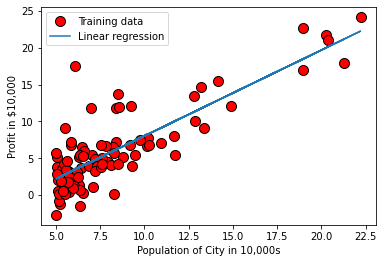

In [22]:
h_x = list()
for x in X:
    h_x.append(predict(x, theta0, theta1))
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')
pyplot.plot(X, h_x, '-')
pyplot.legend(['Training data', 'Linear regression'])

### Making predictions

In [23]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## Multivariate Linear Regression

The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [25]:
train_X = np.loadtxt('Data/ex2traindata.txt')
train_Y = np.loadtxt('Data/ex2trainlabels.txt')
test_X = np.loadtxt('Data/ex2testdata.txt')
test_Y = np.loadtxt('Data/ex2testlabels.txt')

In [26]:
# Normalizing the features
def normalize(X):
  m = X[0].size
  n_X = X.sub(mean_X_train,axis=1)
  n_X = n_X.divide(std_X_train,axis=1)
  return n_X

In [27]:
#adding x0 to our dataframe and renaming
def add_x0(X):
  x0 = np.ones(m)
  n_X = X
  n_X.insert(0,13,x0)
  n_X.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
  return n_X

In [28]:
def m_predict(T,X):
  h=0.0
  h = np.matmul(T,X)
  return h

In [29]:
def m_cost(T,X,Y):
  sum = 0.0
  J = 0.0
  for i in range(m):
    sum += (m_predict(T,X[i])-Y[i])**2
  J = (1/(2*m))*sum
  return J

In [30]:
def m_gradientDescent(X,Y,alpha,n_epoch):
  #m = Y.size
  #n = X[0].size
  Theta = np.array(np.zeros(n+1))
  J = list()  
  for epoch in range(n_epoch):
    for y in range(len(Theta)):
      sum = 0.0
      for i in range(m):
        sum += (m_predict(Theta,X[i])-Y[i])*X[i][y]
      #print(y)
      Theta[y] = Theta[y] - (alpha/m)*sum
      #print("Theta= ",Theta)
    a = m_cost(Theta,X,Y)
    J.append(a)
    #print(J[-1])
  return Theta, J

In [31]:
#converting to data frame
X_train=pd.DataFrame(train_X)
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [32]:
m = train_Y.size
n = train_X[0].size
n_X_train = normalize(X_train)
n_X_train = add_x0(n_X_train)

In [33]:
alpha = 0.01
n_epoch = 3000
T, J = m_gradientDescent(n_X_train.values,train_Y,alpha,n_epoch)

Minimum Cost of training data:  11.012068758250992


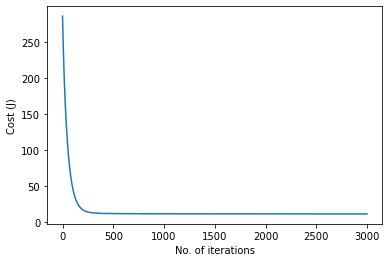

In [34]:
pyplot.plot(J)
pyplot.xlabel("No. of iterations")
pyplot.ylabel("Cost (J)")
print("Minimum Cost of training data: ",J[-1])

In [35]:
X_test = pd.DataFrame(test_X)
m = test_Y.size
n = test_X[0].size
n_X_test = normalize(X_test)
n_X_test = add_x0(n_X_test)

In [36]:
#Gradient Descent on test data
T_test, J_test = m_gradientDescent(n_X_test.values,test_Y,alpha,n_epoch)

Minimum Cost for test data:  7.641458840575162


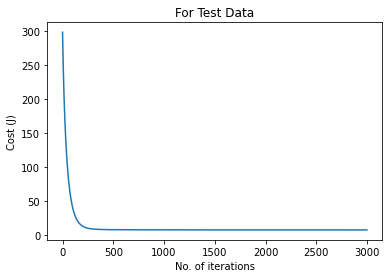

In [37]:
#plotting costs for test data
pyplot.plot(J_test)
pyplot.title("For Test Data")
pyplot.xlabel("No. of iterations")
pyplot.ylabel("Cost (J)")
print("Minimum Cost for test data: ",J_test[-1])

## Regularized Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [39]:
n_X_train = pd.DataFrame(train_X) #converting train data to DataFrame
n_X_test = pd.DataFrame(test_X)   #converting test data to DataFrame
#Getting mean and standard deviation from train data
mean_X_train = n_X_train.mean()
std_X_train = n_X_train.std()
#Normalizing both test and train data using normalize function of part 2
n_X_train = normalize(n_X_train)  
n_X_test = normalize(n_X_test)

In [40]:
''' Start your code of part 3 from here, add the new code cells as per your requirement. '''
#using normalized datasets from part 2, running part 2 before part 3
LR = LinearRegression().fit(n_X_train.values,train_Y)
test_predict = LR.predict(n_X_test)
print("MSE of Linear Regression: ",mean_squared_error(test_Y,test_predict))

MSE of Linear Regression:  23.195599256422977


For alpha  1  the loss =  23.105267829056213
For alpha  0.01  the loss =  23.194660768408074
For alpha  0.1291549665014884  the loss =  23.183535148128193
For alpha  1.6681005372000592  the loss =  23.048590432331352
For alpha  21.544346900318846  the loss =  22.07857092224457
For alpha  278.2559402207126  the loss =  25.44557837511633
For alpha  3593.813663804626  the loss =  56.90913589303863
For alpha  46415.88833612782  the loss =  80.08267146570739
For alpha  599484.2503189421  the loss =  83.41230066829472
For alpha  7742636.826811277  the loss =  83.68762998726181
For alpha  100000000.0  the loss =  83.70906005469314
Minimum Loss
Alpha ( 21.544346900318846 ) has minimum loss of 22.07857092224457


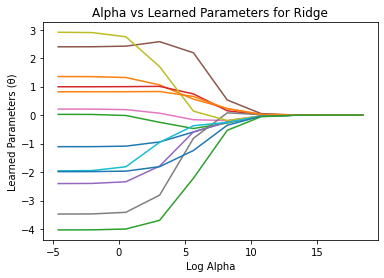

In [41]:
#For RIDGE
MSE = []
ridge = Ridge(alpha=1).fit(n_X_train.values,train_Y)
test_predict = ridge.predict(n_X_test)
a = mean_squared_error(test_predict,test_Y)
MSE.append(a)
print("For alpha ",1," the loss = ",a)

al = np.logspace(-2,8,10)
ridge_learned_para = []
for x in al:
  ridge = Ridge(alpha=x).fit(n_X_train.values,train_Y)
  test_predict = ridge.predict(n_X_test)
  a = mean_squared_error(test_predict,test_Y)
  MSE.append(a)
  print("For alpha ",x," the loss = ",a)
  ridge_learned_para.append(ridge.coef_)

#Plotting regularization coefficients with learned parameters θ
ax = pyplot.gca()
ax.plot(np.log(al),ridge_learned_para)
#ax.set_xscale('log')
pyplot.xlabel('Log Alpha')
pyplot.ylabel('Learned Parameters (θ)')
pyplot.title('Alpha vs Learned Parameters for Ridge')

#Ouput minimum loss
min_loss = MSE[0]
min_index = 0
for i,x in enumerate(MSE):
  if x<min_loss:
    min_loss = x
    min_index = i
print("Minimum Loss\nAlpha (",al[min_index-1],") has minimum loss of",min_loss)

For alpha  1  the loss =  24.176351542829263
For alpha  1e-05  the loss =  23.19544796316378
For alpha  0.0001291549665014884  the loss =  23.1936487641733
For alpha  0.0016681005372000592  the loss =  23.17058766654649
For alpha  0.021544346900318846  the loss =  22.85833326311466
For alpha  0.2782559402207126  the loss =  21.450874232015554
For alpha  3.593813663804626  the loss =  46.18482982932683
For alpha  46.41588833612782  the loss =  83.71085929676252
For alpha  599.4842503189421  the loss =  83.71085929676252
For alpha  7742.636826811277  the loss =  83.71085929676252
For alpha  100000.0  the loss =  83.71085929676252
Minimum Loss
Alpha ( 0.2782559402207126 ) has minimum loss of 21.450874232015554


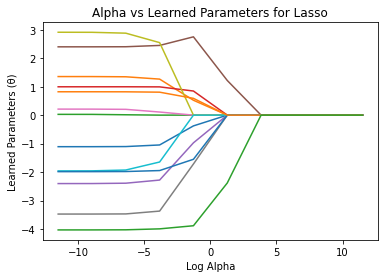

In [42]:
#For LASSO
MSE = []
lasso = Lasso(alpha=1).fit(n_X_train.values,train_Y)
lasso_predict = lasso.predict(n_X_test)
a = mean_squared_error(lasso_predict,test_Y)
MSE.append(a)
print("For alpha ",1," the loss = ",a)

al = np.logspace(-5,5,10)
lasso_learned_para = []
for x in al:
  lasso = Lasso(alpha=x).fit(n_X_train.values,train_Y)
  lasso_predict = lasso.predict(n_X_test)
  a = mean_squared_error(lasso_predict,test_Y)
  MSE.append(a)
  print("For alpha ",x," the loss = ",a)
  lasso_learned_para.append(lasso.coef_)

#Plotting regularization coefficients with learned parameters θ
ax = pyplot.gca()
ax.plot(np.log(al),lasso_learned_para)
#ax.set_xscale('log')
pyplot.xlabel('Log Alpha')
pyplot.ylabel('Learned Parameters (θ)')
pyplot.title('Alpha vs Learned Parameters for Lasso')

#Ouput minimum loss
min_loss = MSE[0]
min_index = 0
for i,x in enumerate(MSE):
  if x<min_loss:
    min_loss = x
    min_index = i
print("Minimum Loss\nAlpha (",al[min_index-1],") has minimum loss of",min_loss)

In [43]:
#For ElasticNet
elastic = ElasticNet(alpha=1).fit(n_X_train,train_Y)
elastic_predict = elastic.predict(n_X_test)
loss = mean_squared_error(elastic_predict,test_Y) 
print("For alpha ",1," loss = ",loss)

alphas=[0.05,0.1,0.15,0.17,0.18,0.19,0.2,1,3,5]
min_loss=loss
min_index
for i,x in enumerate(alphas):
  elastic = ElasticNet(alpha=x).fit(n_X_train,train_Y)
  elastic_predict = elastic.predict(n_X_test)
  loss = mean_squared_error(elastic_predict,test_Y)
  if loss<min_loss:
    min_loss=loss
    min_index =i
  print("For alpha ",x," loss = ",loss)
print("Minimum Loass\nAlpha (",alphas[min_index],") has minimum loss of",min_loss)

For alpha  1  loss =  26.906651940705334
For alpha  0.05  loss =  22.267382828968202
For alpha  0.1  loss =  21.869954504938292
For alpha  0.15  loss =  21.711662490992193
For alpha  0.17  loss =  21.692032858189787
For alpha  0.18  loss =  21.689886799960956
For alpha  0.19  loss =  21.69232979171205
For alpha  0.2  loss =  21.69905989601207
For alpha  1  loss =  26.906651940705334
For alpha  3  loss =  42.962929943457524
For alpha  5  loss =  56.75892225170454
Minimum Loass
Alpha ( 0.18 ) has minimum loss of 21.689886799960956
